# Hand Written Recognition with Gradient Boosting


### Instruction

Make the following three folders.  The notebook should be in the same path as these three folders 

- `train images`: Containing few subfolders.  Each subfolder contains images of a class.  In this example, data has two subfolders: `1` (containing number 1 images) and `2` (containing number 2 images). 

- `test images`: Containing only images for testing.  There is NO subfolder within `test images`

-  The notebook should be in the same folder as these two above folders. 


## Import some packages

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib
 
# import the necessary packages
from sklearn.model_selection import train_test_split
import os
import tkinter
from os import listdir
from PIL import Image

In [2]:
# Set image resolution
dim = 100

# Set the gradient boosting
number_of_trees = 200
learning_rate = .1
depth_of_each_tree = 3 # if depth_of_each_tree=1, we have a stump!


In [3]:
train_folder = 'train images'
test_folder = 'test images'
lab = os.listdir(train_folder)

In [4]:
Xtrain = np.empty((0,3*dim*dim), float)
ytrain = np.empty((0,), int)

for i in range(0, len(lab)): 
    path = train_folder + '/' + lab[i]
    names = [f for f in os.listdir(path)]
    for n in names[0:]:
        img = Image.open(path +'/'+ n)
        image = img.convert('RGB')
        image = image.resize((dim, dim))
        image = np.array(image)
        image = image.ravel().reshape(1,-1)
        Xtrain = np.append(Xtrain, image,0)
        ytrain = np.append(ytrain, i)  


## Training a Random Forest

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=number_of_trees, learning_rate=learning_rate, max_depth=depth_of_each_tree)
model.fit(Xtrain, ytrain)


GradientBoostingClassifier(n_estimators=200)

## Accuracy on Training Data

In [6]:
ypred=model.predict(Xtrain)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ypred, ytrain)
mat

array([[20,  0,  0],
       [ 0, 29,  0],
       [ 0,  0, 23]], dtype=int64)

## Predicting New Images

In the next codes, we will use our fitted model to classify new images of dogs and cats.  The model will label as `Dog` or `Cat`. These labeled images is then save in the **predict** folder.

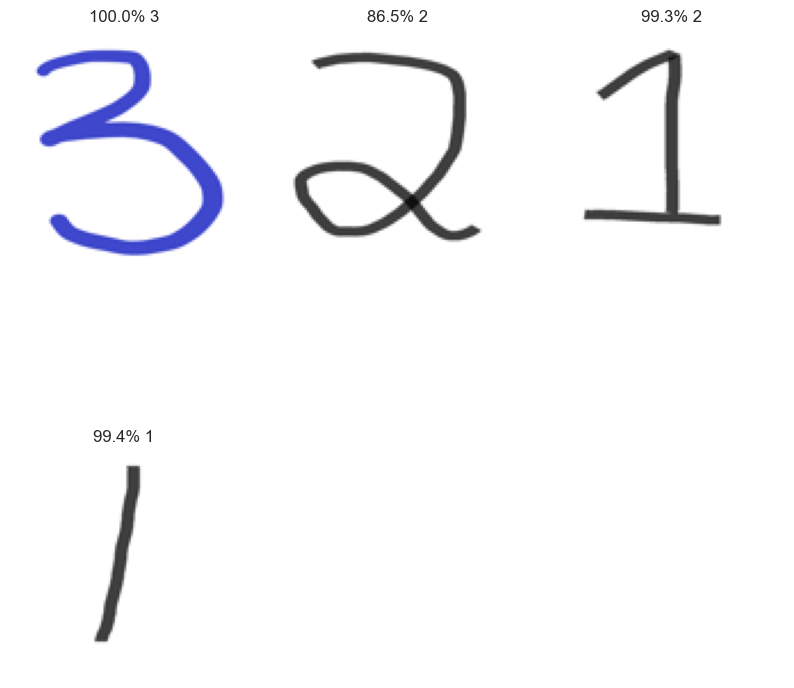

In [7]:
onlyfiles = [f for f in listdir(test_folder)]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i, images in enumerate(onlyfiles):
    
    ax = plt.subplot(int(1+len(onlyfiles)/3), 3, i + 1)
    img = Image.open(test_folder+'/'+images)
    image = img.convert('RGB')
    image = image.resize((dim, dim))
    image_print = image.resize((dim, dim))
    image = np.array(image)
    image = image.ravel().reshape(1,-1)

    predictions = model.predict(image)
    
    confidence = (100*model.predict_proba(image).max()).round(1)
    
    plt.imshow(image_print)
    plt.title(str(confidence)+'% '+lab[predictions[0]])
    plt.axis("off")